In [1]:
import numpy as np
import pandas as pd
import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Krok 1: połączenie z bazą danych i pobranie danych

In [2]:
conn = sqlite3.connect(
    '.../events.sqlite'
    )  # uzupełnij ścieżkę!
df = pd.read_sql_query("SELECT * FROM events", conn)
conn.close()

# Krok 2: wyświetlenie próbki danych

In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,None,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,None,None,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,None,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


# Krok 3: Podstawowe własności danych

- `info()`
- `describe()`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [5]:
df.describe()

,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.554165e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


**Nie wszystkie dane w `df.describe()` mają sens, ograniczymy liczbę wyników na dwa sposoby**

## Opis kolumny liczbowej przy wykorzystaniu `pandas`

In [6]:
df['price'].describe()

count    885129.000000
mean        146.328713
std         296.807683
min           0.220000
25%          26.460000
50%          65.710000
75%         190.490000
max       64771.060000
Name: price, dtype: float64

## Opis danych liczbowych które są ciągiem wartości przy wykorzystaniu `numpy`

In [7]:
prices = df['price'].values

In [8]:
prices[:20]

array([ 31.9 ,  17.16,   9.81, 113.81,  15.87,  52.33, 215.41,  53.14,
        34.17,  53.14,  33.32,  33.32,  14.6 , 268.17, 635.63,  92.  ,
        18.1 ,  73.81,  24.29,  40.95])

In [9]:
from numpy.typing import ArrayLike


def get_stats(data: ArrayLike):

    _count = len(data)
    _mean = np.mean(data)
    _std = np.std(data)
    _min = np.min(data)
    _max = np.max(data)
    _median = np.median(data)
    _perc_25 = np.percentile(data, 25)
    _perc_75 = np.percentile(data, 75)

    _ds = {
        'count': [_count],
        'mean': [_mean],
        'std': [_std],
        'min': [_min],
        '25%': [_perc_25],
        '50%': [_median],
        '75%': [_perc_75],
        'max': [_max]
    }
    _df = pd.DataFrame(_ds).T
    _df.columns = ['value']
    return _df

In [10]:
np_stats = get_stats(prices)

In [11]:
np_stats

,value
count,885129.000000
mean,146.328713
std,296.807515
min,0.220000
25%,26.460000
50%,65.710000
75%,190.490000
max,64771.060000


In [12]:
df['price'].describe()

count    885129.000000
mean        146.328713
std         296.807683
min           0.220000
25%          26.460000
50%          65.710000
75%         190.490000
max       64771.060000
Name: price, dtype: float64

# Krok 4: sprawdzenie duplikatów i brakujących rekordów

In [13]:
len(df.drop_duplicates()) - len(df)

-655

In [14]:
df = df.drop_duplicates()  # Czym mogą być duplikaty?

In [15]:
df.isna()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
885124,False,False,False,False,True,True,False,False,False
885125,False,False,False,False,False,False,False,False,False
885126,False,False,False,False,False,False,False,False,False
885127,False,False,False,False,False,True,False,False,False


In [16]:
df.isna().any()

event_time       False
event_type       False
product_id       False
category_id      False
category_code     True
brand             True
price            False
user_id          False
user_session      True
dtype: bool

In [17]:
heatmap = df[['category_code', 'brand', 'user_session']].isna().values.astype(int)

<Axes: >

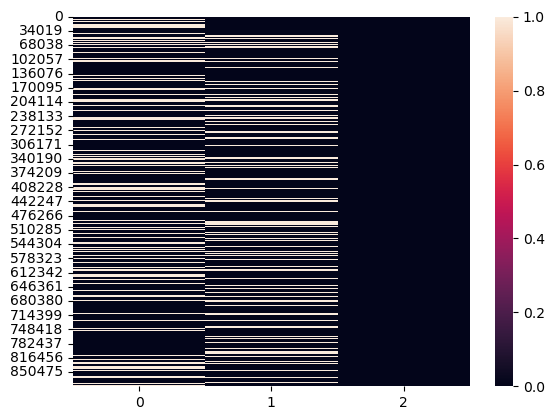

In [18]:
sns.heatmap(heatmap)

# Krok 5: usunięcie brakujących rekordów

In [19]:
(len(df) - len(df.dropna())) / len(df)

0.416766349265213

In [20]:
# Usunięcie tylu wierszy nie jest dobrym pomysłem

In [21]:
# Trzeba zapytać, czy potrzeba kolumn 'category_code' i 'brand'?

In [22]:
df = df.drop(columns=['category_code', 'brand'])

In [23]:
df.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,15.87,1515915625510743344,aa4mmk0kwQ


In [24]:
# A co z kolumną 'user_session'?

In [25]:
sum(df['user_session'].isna())

162

In [26]:
no_user_session = df[df['user_session'].isna()]

In [27]:
no_user_session.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session
2257,2020-09-24 23:47:04 UTC,view,1715896,2144415926731145430,17.40,1515915625496120859,None
6872,2020-09-26 05:14:39 UTC,view,3791351,2144415926966026460,204.29,1515915625519884058,None
7898,2020-09-26 10:58:24 UTC,view,1785245,2144415925011480748,43.11,1515915625495954428,None
11782,2020-09-27 11:59:41 UTC,view,1153724,2144415921169498184,6.29,1515915625520228004,None
24461,2020-09-30 07:31:01 UTC,view,1559260,2144415928845074703,16.83,1515915625397674009,None


# Krok 6: analiza poszczególnych kolumn

## I| event_time

In [28]:
# Zakres dat

min_date = df['event_time'].min()

In [29]:
min_date

'2020-09-24 11:57:06 UTC'

In [30]:
max_date = df['event_time'].max()

In [31]:
max_date

'2021-02-28 23:59:09 UTC'

In [32]:
type(df['event_time'].values[0])

str

In [33]:
df['datetime'] = pd.to_datetime(
    df['event_time'],
    format='%Y-%m-%d %H:%M:%S UTC',
    utc=True
    )

In [34]:
df['datetime'].min()

Timestamp('2020-09-24 11:57:06+0000', tz='UTC')

In [35]:
df['datetime'].max()

Timestamp('2021-02-28 23:59:09+0000', tz='UTC')

In [36]:
min_datetime = df['datetime'].min()
max_datetime = df['datetime'].max()

In [37]:
(max_datetime - min_datetime).days

157

## II| event_type

In [38]:
df['event_type'].nunique()

3

In [39]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [40]:
df['event_type'].value_counts()

event_type
view        793099
cart         54032
purchase     37343
Name: count, dtype: int64

In [41]:
(df['event_type'].value_counts() / len(df)) * 100

event_type
view        89.669001
cart         6.108942
purchase     4.222057
Name: count, dtype: float64

## III| product_id

In [42]:
df['product_id'].nunique()

53453

In [43]:
df['product_id'].nunique() / len(df)

0.060434789490702946

## IV| category_id

In [44]:
df['category_id'].nunique()

718

## V| price

<Axes: ylabel='Frequency'>

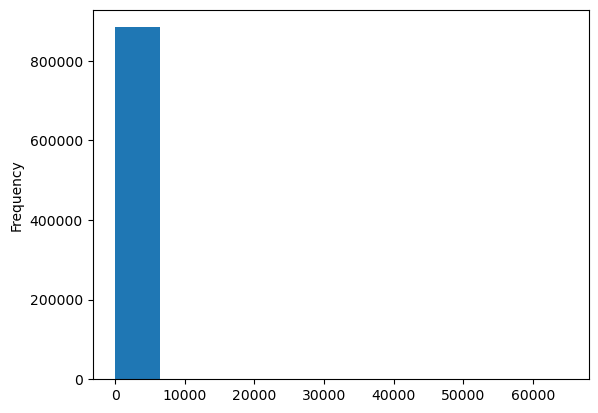

In [45]:
df['price'].plot(kind='hist')

<Axes: xlabel='price', ylabel='Count'>

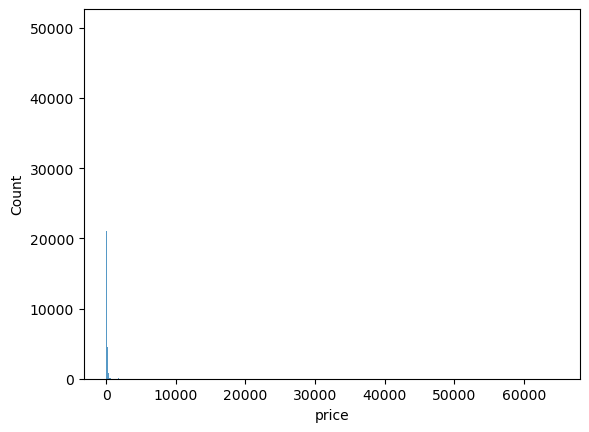

In [46]:
sns.histplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

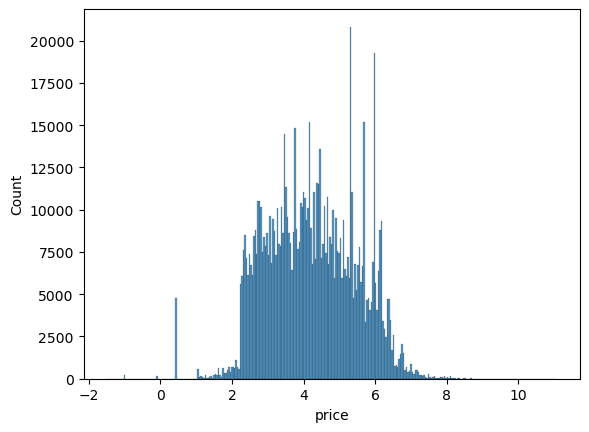

In [47]:
sns.histplot(np.log(df['price']))

In [48]:
df[df['price'] > 60000]

,event_time,event_type,product_id,category_id,price,user_id,user_session,datetime
51272,2020-10-06 06:54:04 UTC,view,4170916,2144415922402623591,64771.06,1515915625522796597,pfaAniPp5L,2020-10-06 06:54:04+00:00
86316,2020-10-14 06:26:41 UTC,view,4170916,2144415922402623591,64771.06,1515915625525406075,M91MkaVScv,2020-10-14 06:26:41+00:00
418716,2020-12-09 18:31:21 UTC,view,4170916,2144415922402623591,64771.06,1515915625556475919,3cyaesEFAP,2020-12-09 18:31:21+00:00
627562,2021-01-17 16:43:17 UTC,view,4170916,2144415922402623591,64771.06,1515915625593603786,nmfeoOLmrb,2021-01-17 16:43:17+00:00


In [49]:
df[df['price'] > 60000]['user_id']

51272     1515915625522796597
86316     1515915625525406075
418716    1515915625556475919
627562    1515915625593603786
Name: user_id, dtype: int64

## VI| user_id & session_id

In [50]:
df['user_id'].nunique()

407283

In [51]:
df['user_session'].nunique()

490398

In [52]:
df['user_id'].nunique() / len(df)

0.46048046635627504

In [53]:
df['user_session'].nunique() / len(df)

0.5544515723469542

# Krok 7: zapisz dane do dalszej analizy

In [54]:
FPATH = '.../events_level_1.csv'  # uzupełnij ścieżkę do pliku

In [ ]:
df.drop('event_time', inplace=True, axis=1)

In [ ]:
df.to_csv(FPATH, index=False)